In [61]:
def randvar_pdf(data,numbins):
    freq , bin_edges = np.histogram(data, bins=numbins)        # Gera o histograma -> dependência do Nunpy
    bins             = bin_edges[:-1]                          # Remove o último valor de borda do bin
    binwidth         = (data.max() - data.min())/(numbins - 1) # Largura dos bins
    freq             = freq/(data.size*binwidth)               # Normalizando os dados
    area             = binwidth*sum(freq)                      # Calculando a área do histograma...
                                                               # ... deve ser ~1 pois foi normalizado
    return bins, freq, area

In [62]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

Ns = 256
U1 = np.random.uniform(size=Ns)
U2 = np.random.uniform(size=Ns)
R = np.sqrt(-2*np.log(U1))
THETA = 2*np.pi*U2
Z1 = R * np.cos(THETA)
Z2 = R * np.sin(THETA)

Xbins1 , Xfreq1 , Xarea1 = randvar_pdf(Z1 , round(np.sqrt(Ns)))
Xbins2 , Xfreq2 , Xarea2 = randvar_pdf(Z2 , round(np.sqrt(Ns)))

Xbinwidth1 = Xbins1[0] - Xbins1[1]
Xbinwidth2 = Xbins2[0] - Xbins2[1]

(-4.0, 4.0)

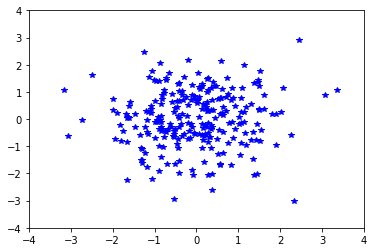

In [63]:
plt.plot(Z1 , Z2 , '*b' , zorder=1)
plt.xlim(-4 , 4)
plt.ylim(-4 , 4)

(-4.0, 4.0)

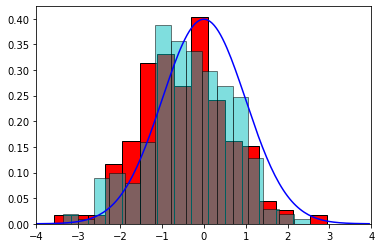

In [64]:
plt.bar(Xbins1 , Xfreq1 , Xbinwidth1 , align='edge' , color='r' , edgecolor='k')
plt.bar(Xbins2 , Xfreq2 , Xbinwidth2 , align='edge' , color='c' , edgecolor='k' , alpha=0.5)

X = np.arange(-4 , 4 , 0.05)
Xpdf = stats.norm.pdf(X)
plt.plot(X , Xpdf , color='b')
plt.xlim(-4 , 4)

(-4.0, 4.0)

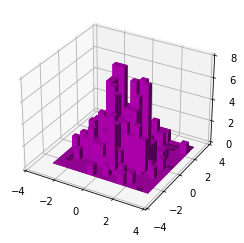

In [69]:
# Plota o histograma bidimensional como um mapa 2D
#plt.hist2d(Z1 , Z2 , bins=round(np.sqrt(Ns)))

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(Z1, Z2, bins=round(np.sqrt(Ns)))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='m', zsort='average')
plt.xlim(-4 , 4)
plt.ylim(-4 , 4)